In [1]:
import jax
import jax.numpy as jnp
import myjax.nn as nn
import myjax.optim as optim
from myjax.utils import Dataset, DataLoader
import matplotlib.pyplot as plt


In [5]:
def mse_loss(input, target):
    return jnp.mean((input-target)**2)


class MyModel(nn.Model):
    def __init__(self) -> None:
        super().__init__()
        self.model = nn.Sequential([nn.Linear(1, 1)])

    def training_step(self, params, batch):
        # MSE Loss
        x, y = batch
        # print (params)
        y_hat = self.model(params, x)
        loss = mse_loss(y_hat, y)
        return loss

    def configure_optimizers(self):
        sgd = optim.SGD(learning_rate=0.03)
        return sgd



The model is: 
Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True), Total parameters: 2, 
)
Total parameters: 2

The initial parameters are: 
{0: {'weights': Array([[0.27674624]], dtype=float32), 'bias': Array([-0.02575834], dtype=float32)}}

Epoch (    0/ 1000) train_loss = 47.199
Epoch (  100/ 1000) train_loss = 0.94399
Epoch (  200/ 1000) train_loss = 0.94356
Epoch (  300/ 1000) train_loss = 0.94115
Epoch (  400/ 1000) train_loss = 0.93922
Epoch (  500/ 1000) train_loss = 0.94147
Epoch (  600/ 1000) train_loss = 0.94144
Epoch (  700/ 1000) train_loss = 0.93969
Epoch (  800/ 1000) train_loss = 0.94082
Epoch (  900/ 1000) train_loss = 0.94383
Epoch ( 1000/ 1000) train_loss = 0.94202

The final parameters are (with w = 3.0 and b = -1.0 as correct answer): 
{0: {'bias': Array([-1.0261458], dtype=float32), 'weights': Array([[2.9437714]], dtype=float32)}}


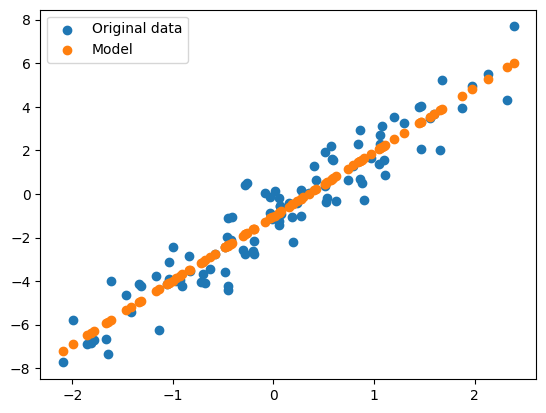

In [6]:
# Random data for testing
seed = 1701
key = jax.random.PRNGKey(seed)
key, x_key, n_key = jax.random.split(key, num=3)
xs = jax.random.normal(x_key, shape=(100,1))
noise = jax.random.normal(n_key, shape=(100,1))
w = 3.0
b = -1.0
ys = xs * w + b + noise

# Create dataset
dataset = Dataset(xs, ys)

# Create dataloader
data = DataLoader(dataset, key=key, batch_size=20)

# Create model
mymodel = MyModel()

# Initialize Model
key, l1_key = jax.random.split(key)
key, params = mymodel.init(key)
print ('\nThe model is: ')
print (mymodel)


# Initialize trainer
trainer = nn.Trainer(max_epochs=1000)
print ('\nThe initial parameters are: ')
print (params)


# Fit model
params = trainer.fit(params, mymodel, data, log_epoch=100)
print (f'\nThe final parameters are (with w = {w} and b = {b} as correct answer): ')
print (params)


# Compare final answer
plt.figure()
plt.scatter(xs, ys,label='Original data')
y_hat = jnp.array(mymodel.model(params, xs))
plt.scatter(xs, y_hat,label='Model')
plt.legend();


